In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [205]:
df=pd.read_csv('D:data\hr.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies.

The values present in the below columns represents the given following terms:

Education:
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating:
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance:
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

All the values present in the other columns are easy to understand.

In [206]:
df.shape

(1470, 35)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [208]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

1) The HR dataset has 1470 rows and 35 columns.

2) There are 26 columns in int64 and 9 columns in object datatype.

3) The dataset has no null values.

In [209]:
# Summary Statistics

In [210]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [211]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [212]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

* The average age of the people is 36yr
* 1233 are current employees and 237 are ex-employees of the company
* The employees travel rarely
* The average distance from home is 9km.
* The data has shows the outliers are present. 

In [213]:
# To check missing data

In [214]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

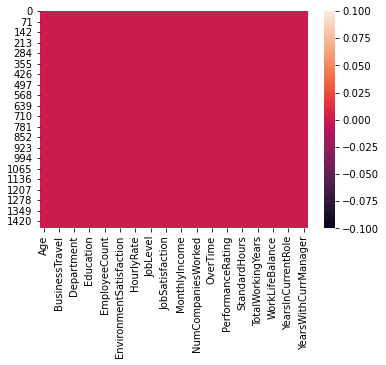

In [215]:
sns.heatmap(df.isnull())

The dataset has no missing values present we can clearly see that from the visualization

In [216]:
 # Visualization  univarient and bivarient 

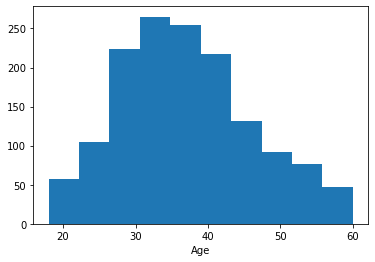

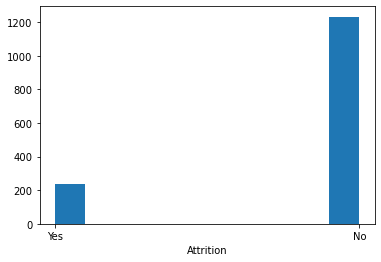

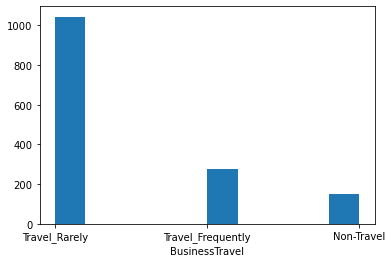

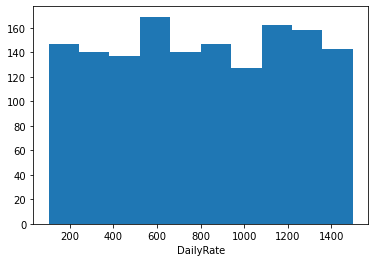

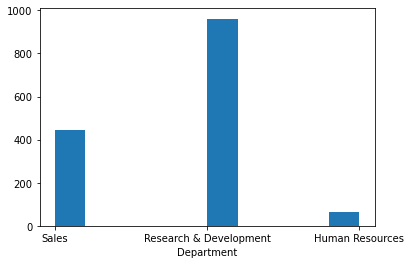

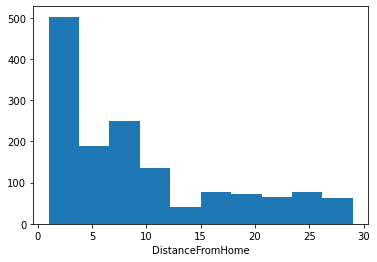

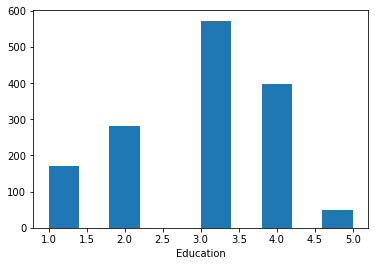

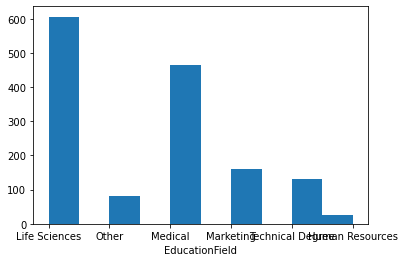

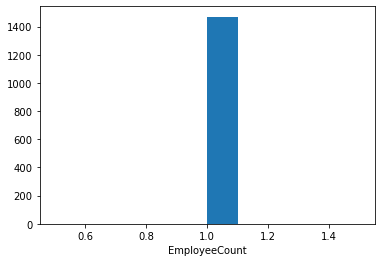

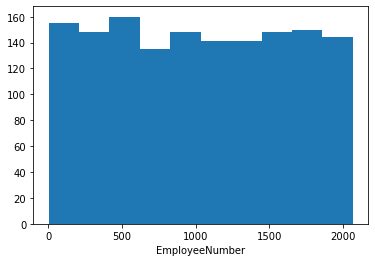

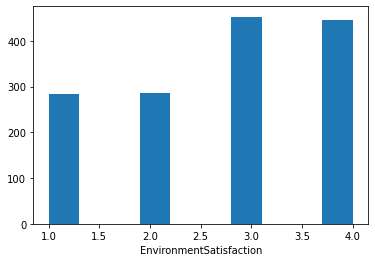

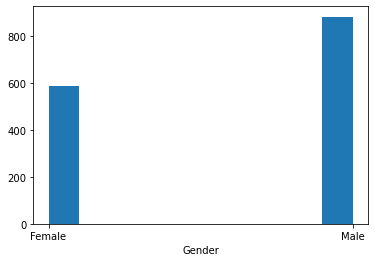

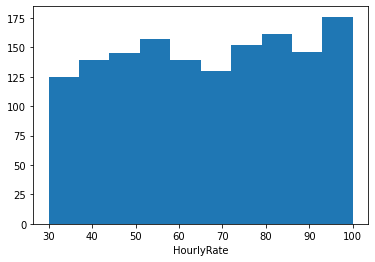

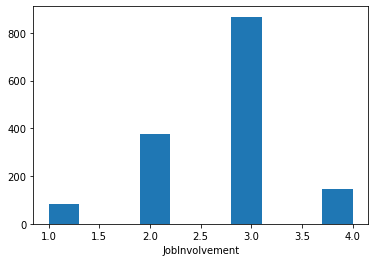

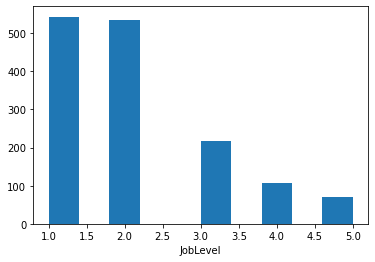

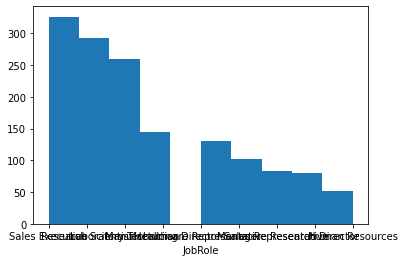

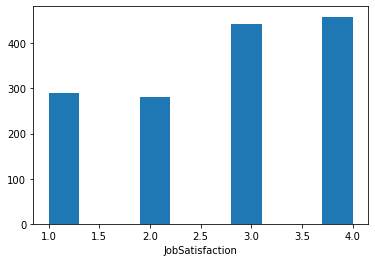

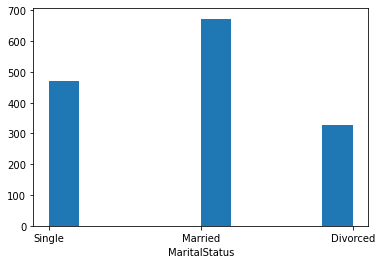

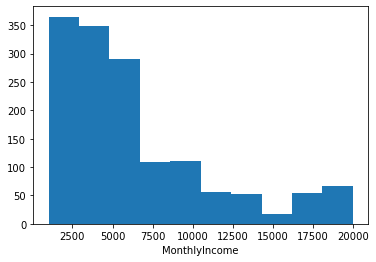

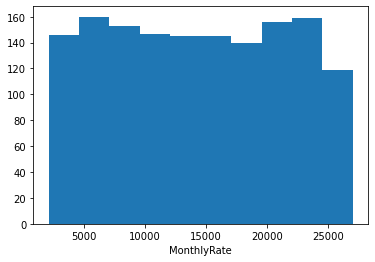

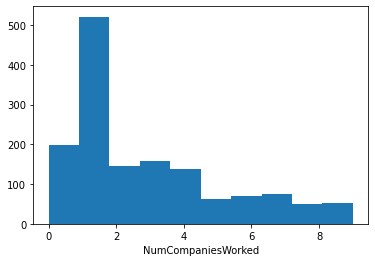

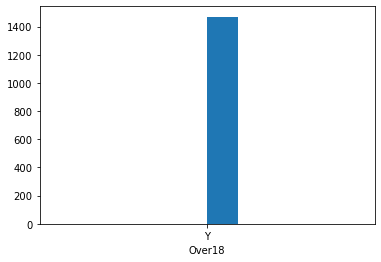

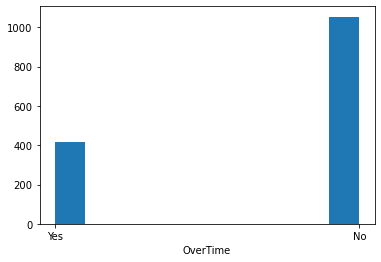

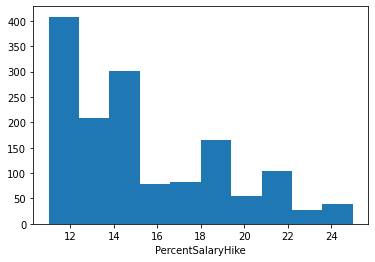

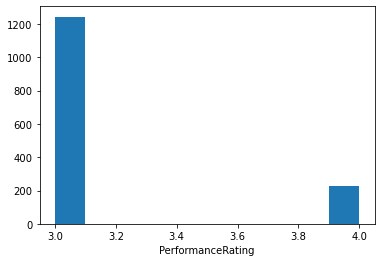

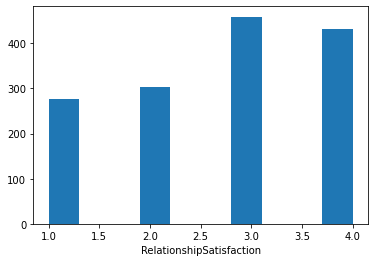

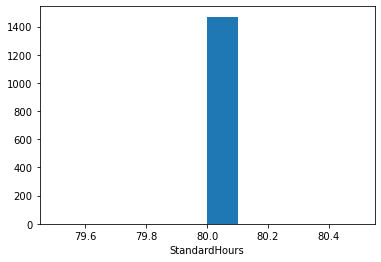

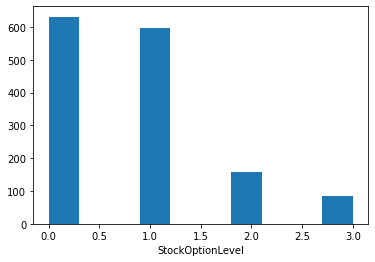

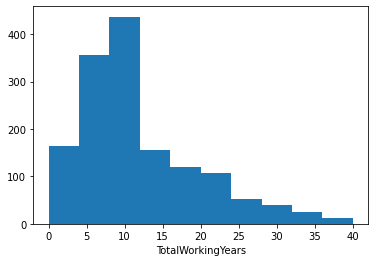

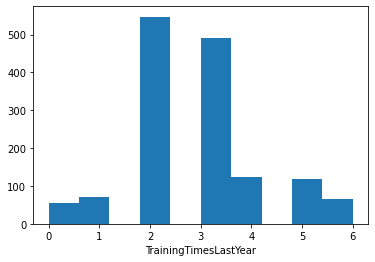

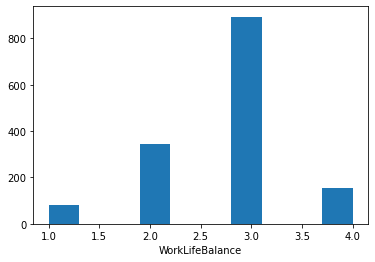

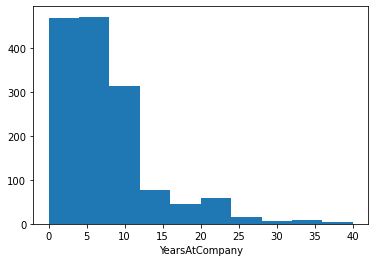

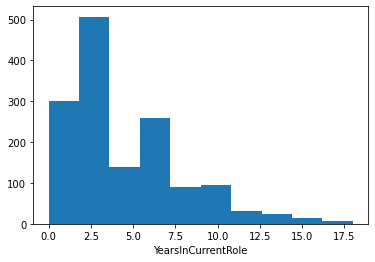

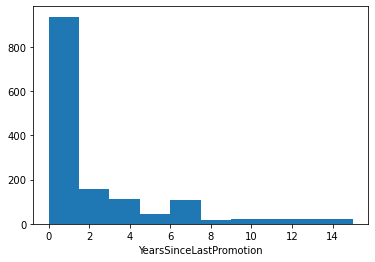

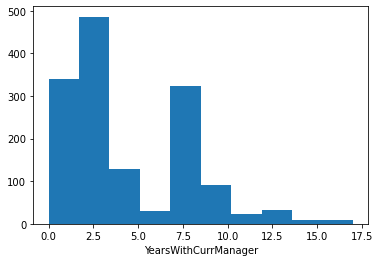

<Figure size 432x288 with 0 Axes>

In [217]:
for i in df.columns:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.figure()

* The dataset has most people from agegroup 30-35 yr.
* Most people travel less, 0 to 1.5 yr since last promotion, 0-3 yr working with the same manager & in current role.
* Most peoplehave 0-7.5 yr in same company, Most people has 'better' work life balance, 5-10 yr working years, Excelent Performance rating , high Relationship Satisfaction , 12% percent Salary hike.
* Most employees dont do Overtime, worked in 1-2 companies , 2500 monthly income.
* Most employees are married, high job satisfaction , high job involvement, 90-100 hourly rate.
* More employees are Male , high Environment satisfaction , Life science as Education field.
* Most employees are Bachelor.

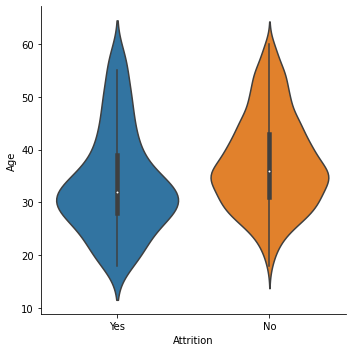

In [218]:
sns.catplot(x='Attrition',y='Age',data=df,kind='violin')

* The employees who leave the job belong to Age around 30 yr.
* The employees of the company are mostly between 30-40 yr.

In [219]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

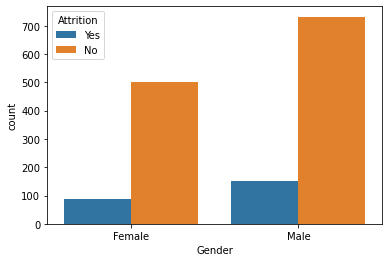

In [220]:
sns.countplot(x='Gender',hue='Attrition',data=df)

* More male employees leave the job than Female employees.

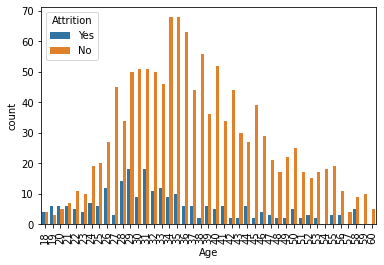

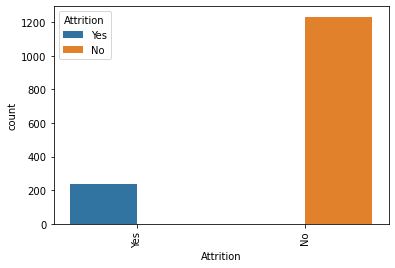

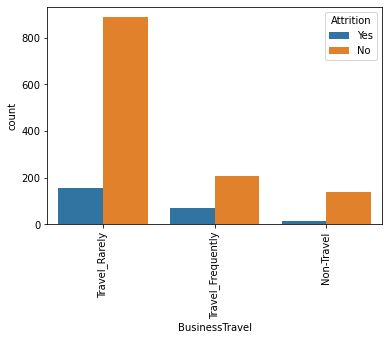

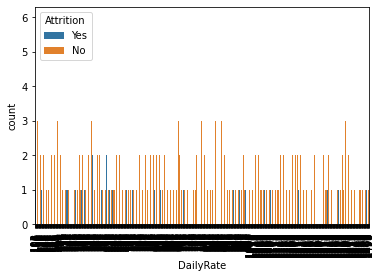

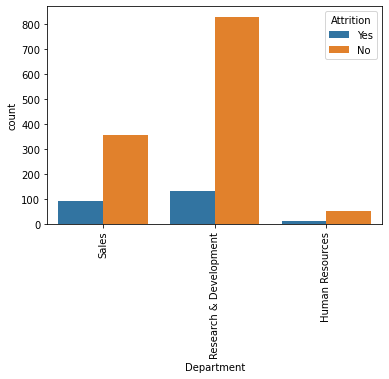

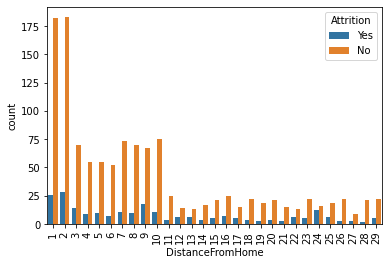

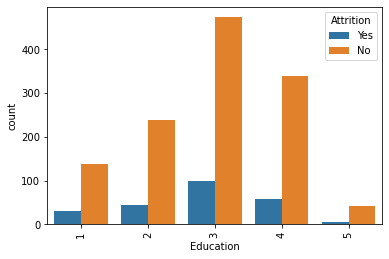

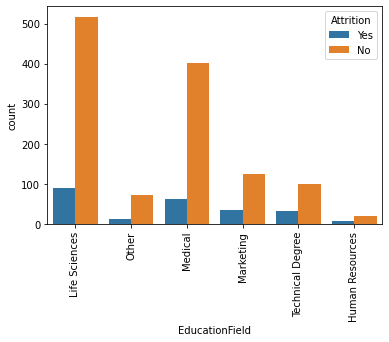

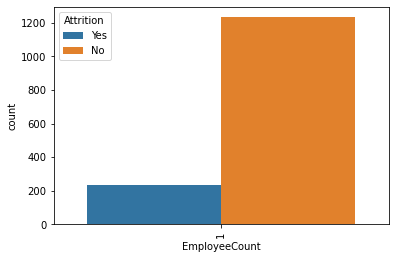

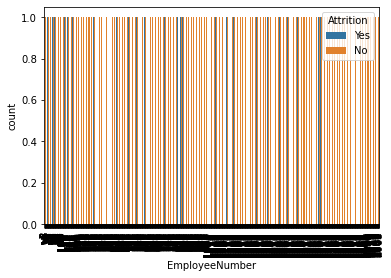

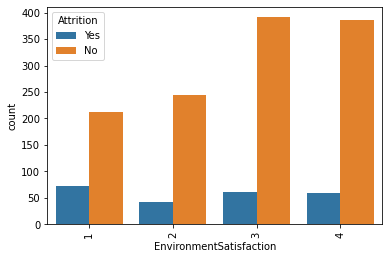

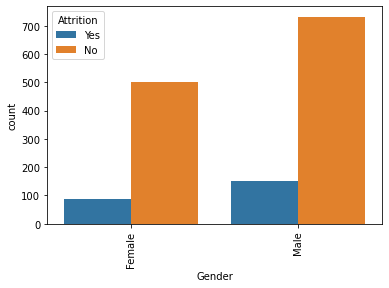

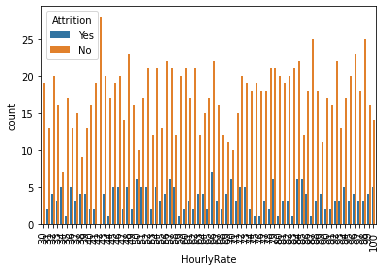

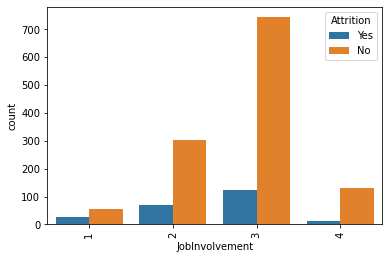

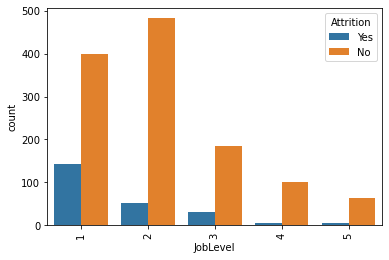

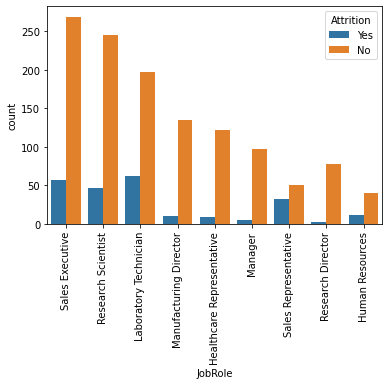

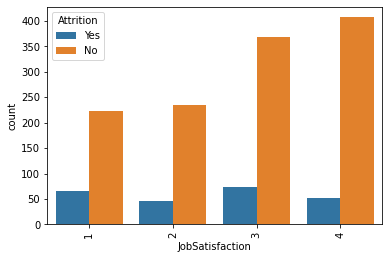

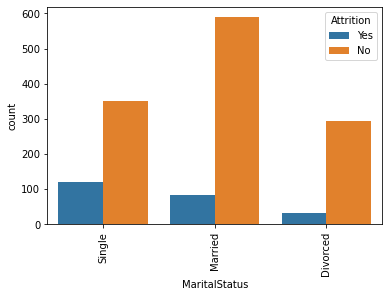

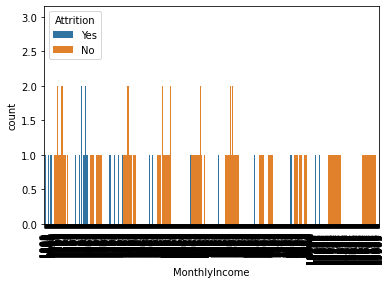

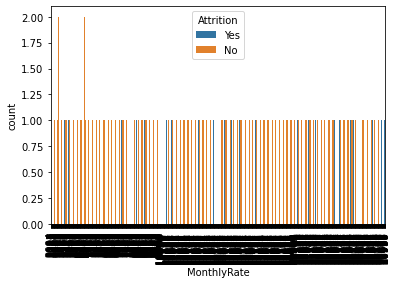

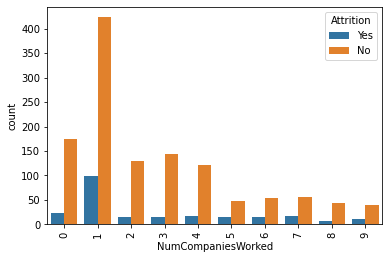

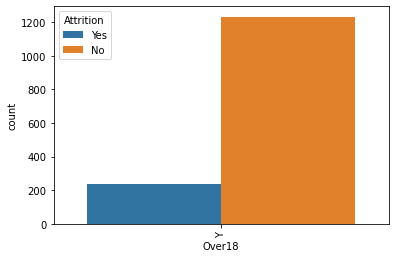

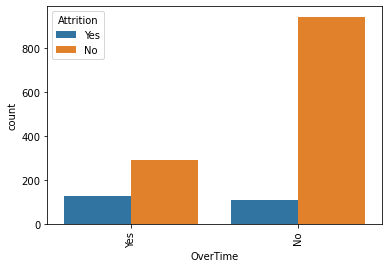

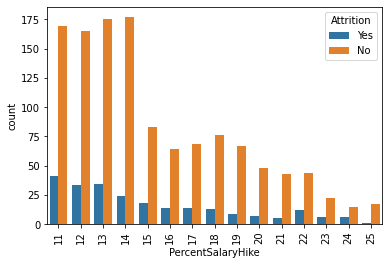

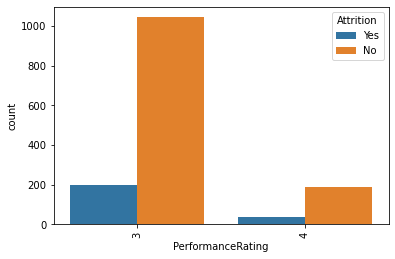

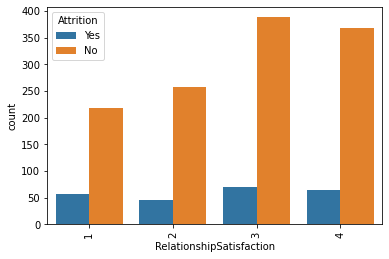

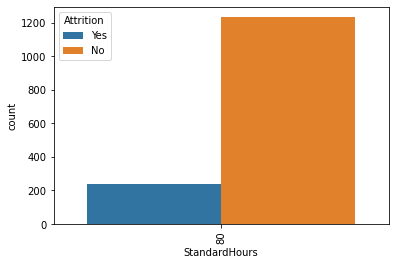

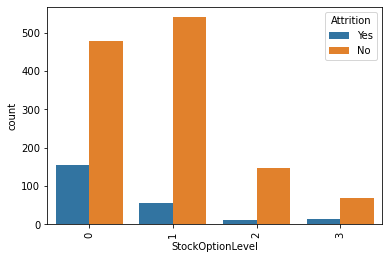

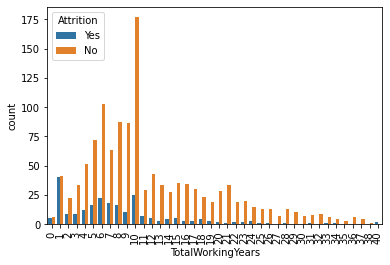

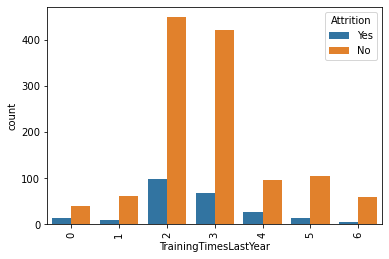

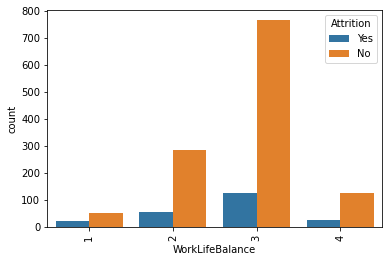

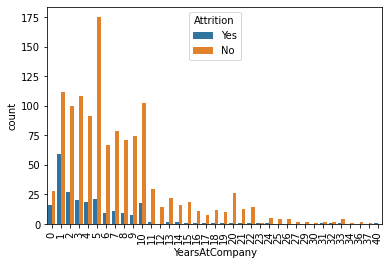

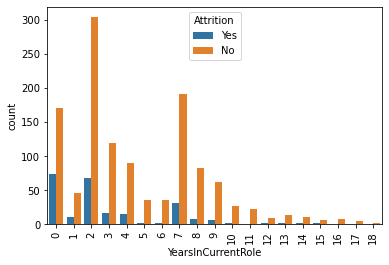

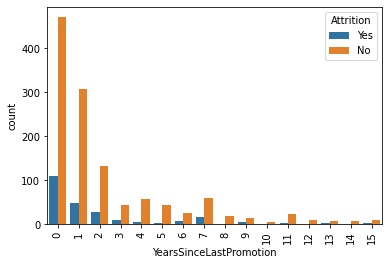

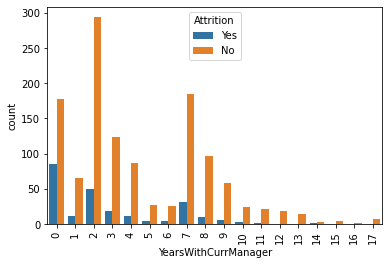

In [221]:
for i in df.columns:
    sns.countplot(x=i,hue='Attrition',data=df)
    plt.xticks(rotation=90)
    plt.show()

* Employee who leave the company are of age 29 & 31.   
* The employees who leave company Travel rarely, are from R&D department ,live around 2 km , have Bachelor Degree , from life Science field , with 'LOW' Environment Satisfaction , Male , 'HIGH' Job involvement, Laboratory Technician , 'HIGH' job satisfaction , Single , worked in 1 company , do Overtime , 11% salary hike ,'HIGH'performance rate ,working years as 1 ,'High' work life balance, works 1 yr in the company , 0 or 2 yr in current role , 0 yr since promotion , 0 yr work with current manager.

In [222]:
# Converting Categorical data into numerical dataa

In [223]:
from sklearn import preprocessing 
columns=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for i in columns:
    label_encoder = preprocessing.LabelEncoder()   
    df[i]= label_encoder.fit_transform(df[i]) 
    df[i].unique() 

In [224]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

All data is converted into numerical datatype.

Age                             AxesSubplot(0.125,0.71587;0.0731132x0.16413)
Attrition                    AxesSubplot(0.212736,0.71587;0.0731132x0.16413)
BusinessTravel               AxesSubplot(0.300472,0.71587;0.0731132x0.16413)
DailyRate                    AxesSubplot(0.388208,0.71587;0.0731132x0.16413)
Department                   AxesSubplot(0.475943,0.71587;0.0731132x0.16413)
DistanceFromHome             AxesSubplot(0.563679,0.71587;0.0731132x0.16413)
Education                    AxesSubplot(0.651415,0.71587;0.0731132x0.16413)
EducationField               AxesSubplot(0.739151,0.71587;0.0731132x0.16413)
EmployeeCount                AxesSubplot(0.826887,0.71587;0.0731132x0.16413)
EmployeeNumber                 AxesSubplot(0.125,0.518913;0.0731132x0.16413)
EnvironmentSatisfaction     AxesSubplot(0.212736,0.518913;0.0731132x0.16413)
Gender                      AxesSubplot(0.300472,0.518913;0.0731132x0.16413)
HourlyRate                  AxesSubplot(0.388208,0.518913;0.0731132x0.16413)

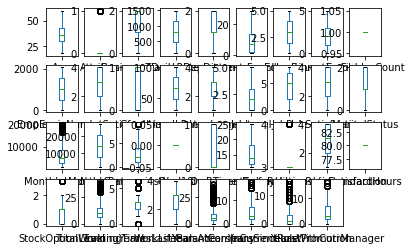

In [225]:
df.plot(kind='box',subplots=True,layout=(4,9))

The dataset has some columns with outliers. no zscore is applied to remove as it is removing all the data.

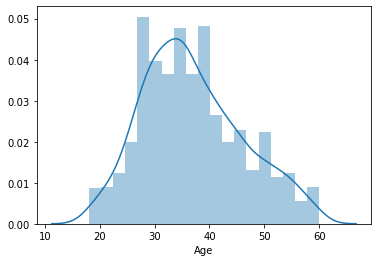

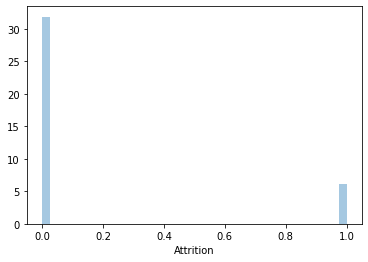

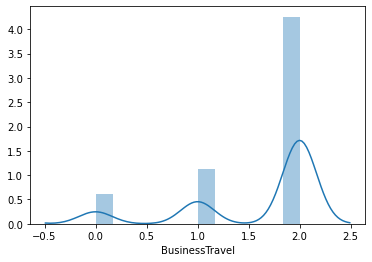

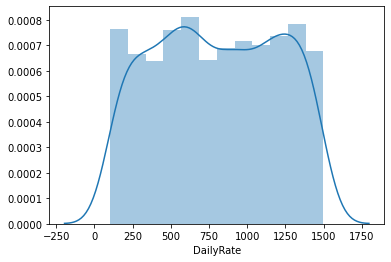

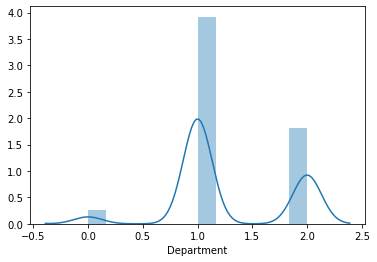

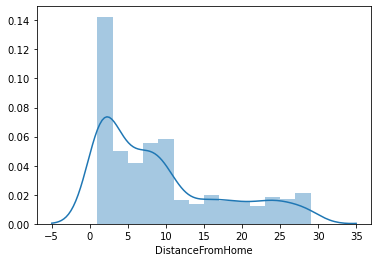

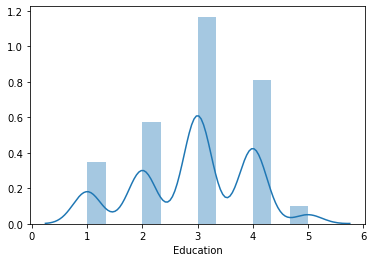

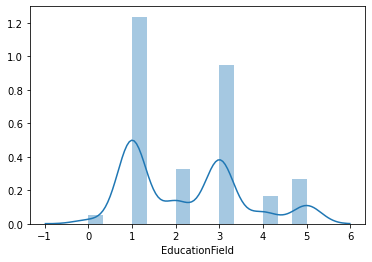

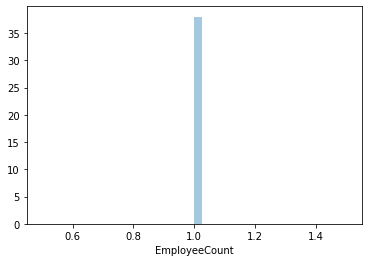

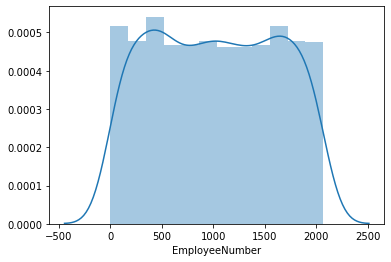

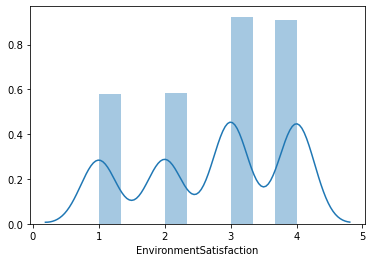

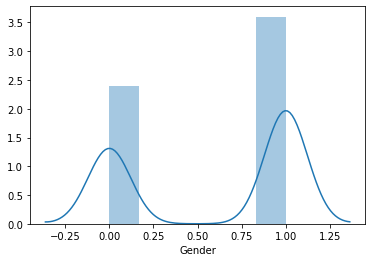

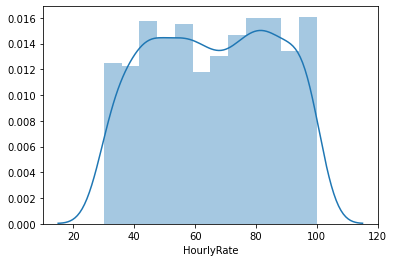

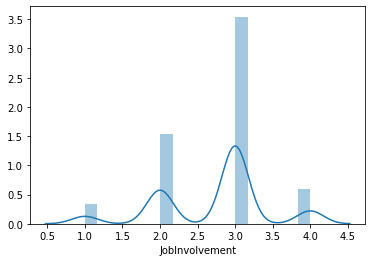

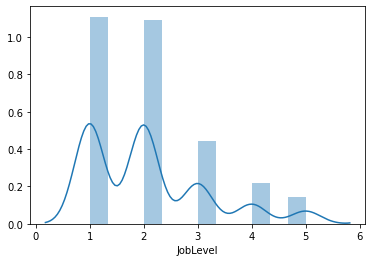

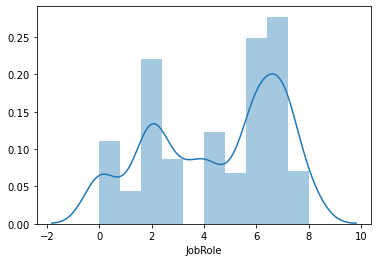

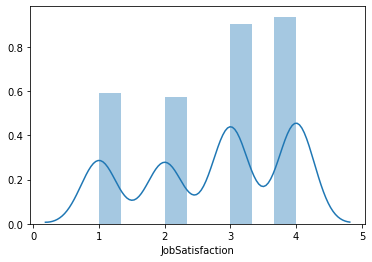

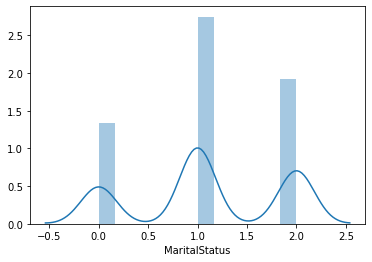

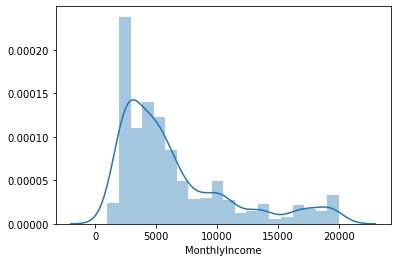

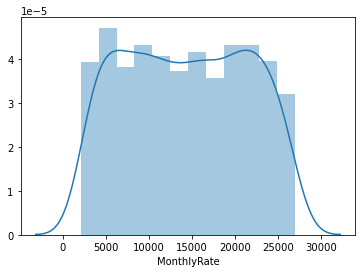

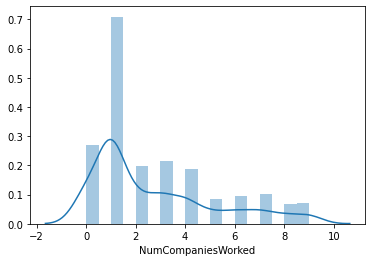

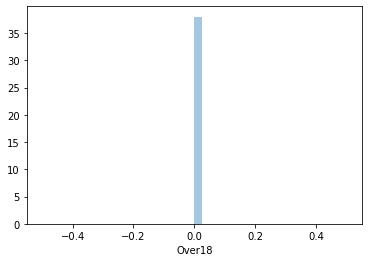

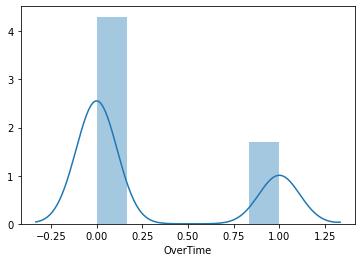

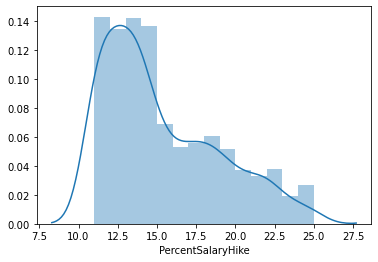

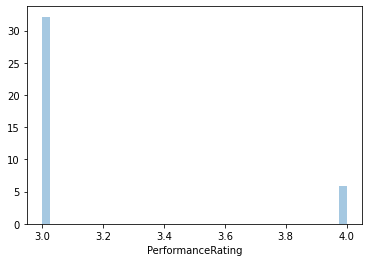

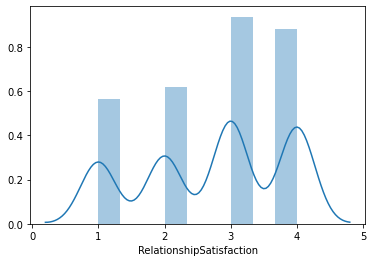

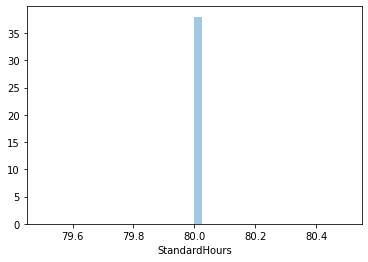

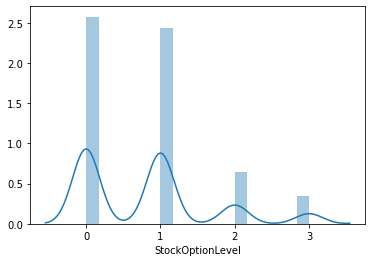

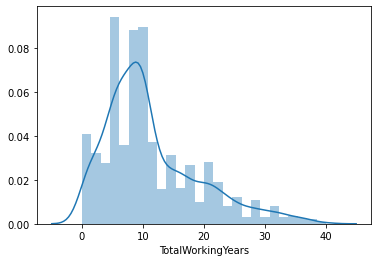

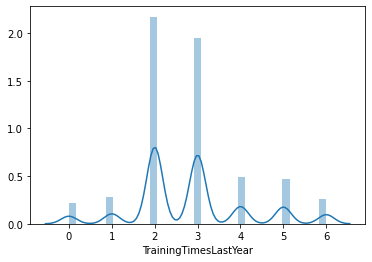

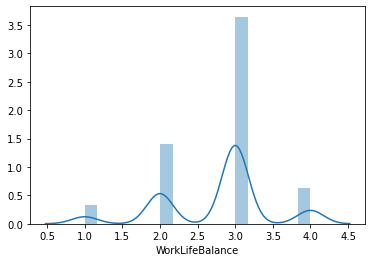

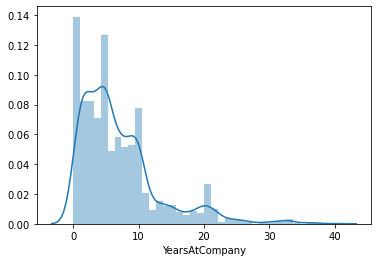

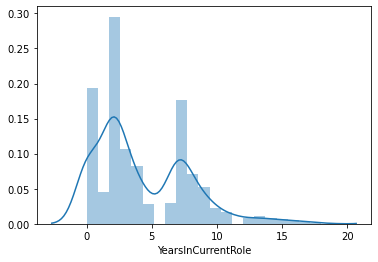

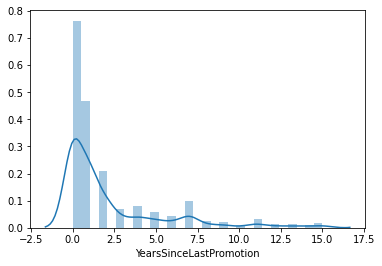

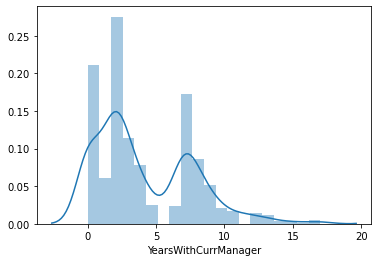

<Figure size 432x288 with 0 Axes>

In [226]:
for i in df.columns:
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.figure()

In [227]:
from sklearn.preprocessing import power_transform
print(power_transform(df))

[[ 0.52213976  2.28090588  0.63546836 ...  0.2055623  -1.09486169
   0.49014719]
 [ 1.27641097 -0.4384223  -1.39286498 ...  0.883888    0.09685415
   0.90963491]
 [ 0.10209148  2.28090588  0.63546836 ... -1.59643394 -1.09486169
  -1.55015588]
 ...
 [-1.12375507 -0.4384223   0.63546836 ... -0.44664507 -1.09486169
  -0.05300033]
 [ 1.27641097 -0.4384223  -1.39286498 ...  0.68299511 -1.09486169
   1.09011007]
 [-0.23618832 -0.4384223   0.63546836 ... -0.08961473  0.09685415
  -0.40688122]]


* The distplot shows the skewness is present in the data.
* The power_transformation methord is used to remove the skewness.

In [265]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


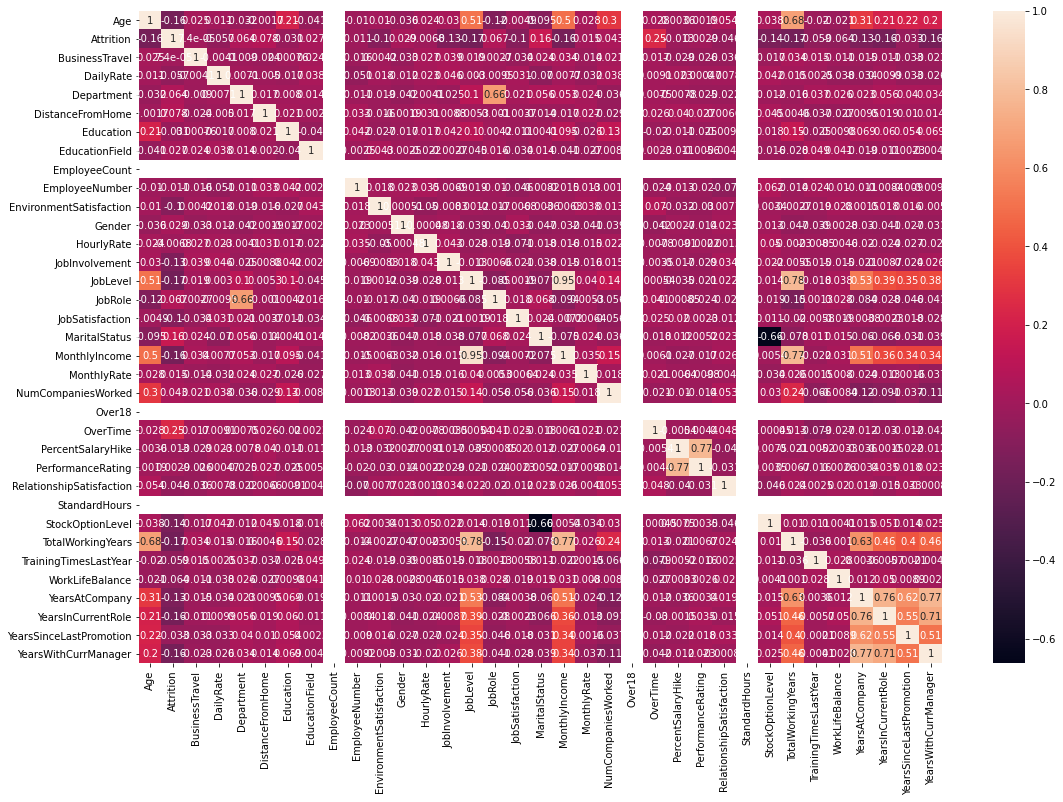

In [267]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True)

The columns EmployeeCount,Over18,StandardHour shows white or blank because the have only one type of data. Most column are normally correlated & some columns YearsInCurrentRole,YearsAtCompany are highly positively correlated with the columnn 'target'.

In [228]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [229]:
 # Model Training

In [230]:
xn=df.drop(['Attrition'],axis=1)

In [231]:
y=df['Attrition']
y=pd.DataFrame(data=y)

In [232]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(xn)
x=pd.DataFrame(x,columns=xn.columns)

In [233]:
# Standard Scaler is used to scaling the data or normalising.

In [234]:
max_r_score=0;
for r in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=r)
    lg=LogisticRegression()
    lg.fit(x_train,y_train) 
    pred=lg.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    if accuracy> max_r_score:
        max_r_score=accuracy;
        final_r_state=r;
print('max accuracy score for random state:',final_r_state,"is:",max_r_score)

max accuracy score for random state: 40 is: 0.9074074074074074


In [1]:
# the Logistic Regression model is giving beat result at randaom state at 40.

In [236]:
print(x_train.shape ,'\t',y_train.shape)

(1146, 34) 	 (1146, 1)


In [237]:
print(x_test.shape ,'\t',y_test.shape)

(324, 34) 	 (324, 1)


In [238]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=40)

In [239]:
lg=LogisticRegression()
lg.fit(x_train,y_train) 
pred=lg.predict(x_test)
print('accuracy score:',accuracy_score(y_test,pred),'\n')
print('confusion_matrix:','\n',confusion_matrix(y_test,pred),'\n')
print('classification_report:','\n',classification_report(y_test,pred))

accuracy score: 0.9074074074074074 

confusion_matrix: 
 [[267   5]
 [ 25  27]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       272
           1       0.84      0.52      0.64        52

    accuracy                           0.91       324
   macro avg       0.88      0.75      0.79       324
weighted avg       0.90      0.91      0.90       324



The Logistic Regression model is giving the accuracy score of 0.9074.

In [240]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [241]:
model=[GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()];

In [242]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(m,'\n')
    print('accuracy score:',accuracy_score(y_test,predm),'\n')   
    print('confusion_matrix:','\n',confusion_matrix(y_test,predm),'\n')
    print('classification_report:','\n',classification_report(y_test,predm))
    print('**********************************************************************************************************************')
    print('\n')

GaussianNB() 

accuracy score: 0.8240740740740741 

confusion_matrix: 
 [[233  39]
 [ 18  34]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       272
           1       0.47      0.65      0.54        52

    accuracy                           0.82       324
   macro avg       0.70      0.76      0.72       324
weighted avg       0.85      0.82      0.84       324

**********************************************************************************************************************


DecisionTreeClassifier() 

accuracy score: 0.7777777777777778 

confusion_matrix: 
 [[230  42]
 [ 30  22]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       272
           1       0.34      0.42      0.38        52

    accuracy                           0.78       324
   macro avg       0.61      0.63      0.62       324
weighted avg       0.80 

The SVC model is giving the best accuracy score i.e 0.8672. but still less than Logistic Regression model.

In [243]:
from sklearn.model_selection import GridSearchCV

In [244]:
parameters={'kernel':['linear','poly','rgf'],'C':[1,10]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
sorted(clf.cv_results_.keys())
print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


In [245]:
svc=SVC(kernel='linear',C=10)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('accuracy score:',accuracy_score(y_test,predsvc),'\n')   
print('confusion_matrix:','\n',confusion_matrix(y_test,predsvc),'\n')
print('classification_report:','\n',classification_report(y_test,predsvc))

accuracy score: 0.8888888888888888 

confusion_matrix: 
 [[270   2]
 [ 34  18]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       272
           1       0.90      0.35      0.50        52

    accuracy                           0.89       324
   macro avg       0.89      0.67      0.72       324
weighted avg       0.89      0.89      0.87       324



The GridSearchCV model is used for Hypertunning the SVC model to check if it give the best result.

In [246]:
from sklearn.model_selection import cross_val_score

In [247]:
svcscore=cross_val_score(svc,x,y,cv=5)
print(svcscore)

[0.87755102 0.86054422 0.8707483  0.8707483  0.86734694]


In [248]:
print(svcscore.mean(),svcscore.std())

0.8693877551020408 0.005526556737847598


The cross validation is used to remove the underfitting and overfitting of the data.

In [249]:
#Ensemble Techniques

In [250]:
from sklearn.ensemble import RandomForestClassifier

In [251]:
rf=RandomForestClassifier(n_estimators=100,random_state=40)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rf.score(x_train,y_train)

1.0

In [252]:
print('accuracy score:',accuracy_score(y_test,predrf),'\n')   
print('confusion_matrix:','\n',confusion_matrix(y_test,predrf),'\n')
print('classification_report:','\n',classification_report(y_test,predrf))

accuracy score: 0.8672839506172839 

confusion_matrix: 
 [[271   1]
 [ 42  10]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       272
           1       0.91      0.19      0.32        52

    accuracy                           0.87       324
   macro avg       0.89      0.59      0.62       324
weighted avg       0.87      0.87      0.83       324



In [253]:
# AdaBoostClassifier

In [254]:
from sklearn.ensemble import AdaBoostClassifier

In [255]:
ada=AdaBoostClassifier(base_estimator=lg,n_estimators=20,random_state=40)
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
ada.score(x_train,y_train)

0.8656195462478184

In [256]:
print('accuracy score:',accuracy_score(y_test,predada),'\n')   
print('confusion_matrix:','\n',confusion_matrix(y_test,predada),'\n')
print('classification_report:','\n',classification_report(y_test,predada))

accuracy score: 0.9074074074074074 

confusion_matrix: 
 [[270   2]
 [ 28  24]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       272
           1       0.92      0.46      0.62        52

    accuracy                           0.91       324
   macro avg       0.91      0.73      0.78       324
weighted avg       0.91      0.91      0.89       324



The AdaBoostClassifier is used on the Logistic Regression model to get the best score.

In [257]:
adascore=cross_val_score(ada,x,y,cv=5)
print(adascore)

[0.87414966 0.86734694 0.86734694 0.85714286 0.86734694]


In [258]:
print(adascore.mean(),adascore.std())

0.8666666666666668 0.005442176870748305


The Logistic Regression model is cross validated to overcome underfitting & overfitting.

In [259]:
from sklearn.metrics import roc_auc_score,roc_curve

In [260]:
fpr,tpr,thresolds=roc_curve(y_test,predada)

In [261]:
fpr

array([0.        , 0.00735294, 1.        ])

In [262]:
tpr

array([0.        , 0.46153846, 1.        ])

In [263]:
thresolds

array([2, 1, 0])

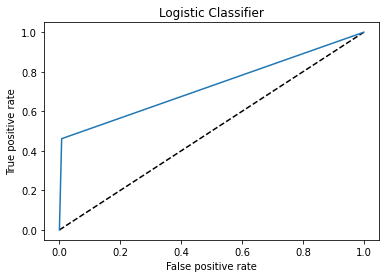

In [264]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Classifier')
plt.show()

The ROC curve is used to represented the y_test and predicted data.

In [268]:
import joblib

In [269]:
joblib.dump(ada,'titanic_dataset.pkl')

['titanic_dataset.pkl']